<a href="https://colab.research.google.com/github/coulibalyIsmael/deep_learning/blob/main/data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torchvision.datasets import CIFAR10

In [2]:
train_data = CIFAR10(root='./train', train=True, download=True)

100%|██████████| 170M/170M [00:03<00:00, 43.4MB/s]


Extracting ./train/cifar-10-python.tar.gz to ./train


In [3]:
print(train_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train
    Split: Train


In [4]:
print(len(train_data))

50000


In [9]:
print(train_data.targets)

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

In [10]:
print(train_data.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [11]:
print(train_data.class_to_idx)

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [14]:
data, label = train_data[0]
print("data: ", data)
print("label: ", label)
print("class: ", train_data.classes[label])

data:  <PIL.Image.Image image mode=RGB size=32x32 at 0x7EBA64336450>
label:  6
class:  frog


In [17]:
import matplotlib.pyplot as plt


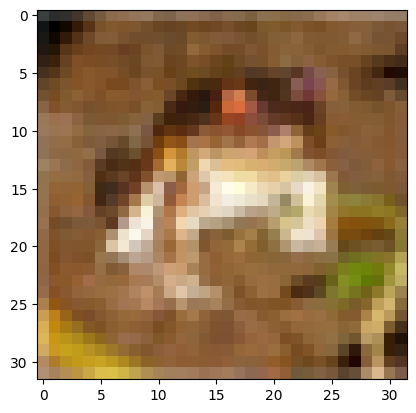

In [18]:
plt.imshow(data)

In [19]:
# Download test data
test_data = CIFAR10(root='./test', train=False, download=True)

100%|██████████| 170M/170M [00:03<00:00, 43.8MB/s]


Extracting ./test/cifar-10-python.tar.gz to ./test


In [20]:
print(test_data)

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test
    Split: Test


In [21]:
print(len(test_data))

10000


In [22]:
from torchvision import transforms


In [32]:
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2023, 0.1994, 0.2010)
    )
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(
        mean=(0.4914, 0.4822, 0.4465),
        std=(0.2023, 0.1994, 0.2010)
    )
])


In [35]:
train_data = CIFAR10(root='./train/', train=True, download=True,transform=transform)
test_data = CIFAR10(root='./test/', train=False, download=True, transform=test_transform)

Files already downloaded and verified
Files already downloaded and verified


In [37]:
print("->train dataset: ", train_data)
print("->test dataset: ", test_data)

->train dataset:  Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./train/
    Split: Train
    StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )
->test dataset:  Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./test/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [26]:
print(train_data.transforms)

StandardTransform
Transform: Compose(
               RandomCrop(size=(32, 32), padding=4)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.2023, 0.1994, 0.201))
           )


In [27]:
data_tensor, label  = train_data[0]
print(type(data_tensor))
print(data_tensor.shape)

<class 'torch.Tensor'>
torch.Size([3, 32, 32])


In [29]:
from PIL.Image import Image

In [30]:
img = transforms.ToPILImage()(data_tensor)

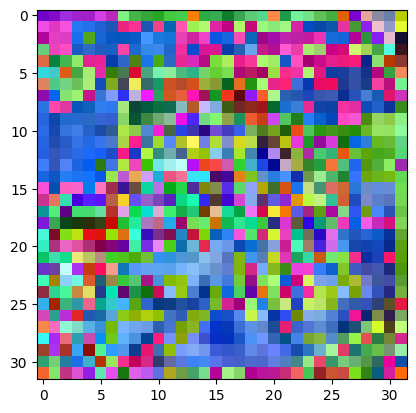

In [31]:
plt.imshow(img)

In [39]:
traindataloader = torch.utils.data.DataLoader(train_data, batch_size=16, shuffle=True)

In [40]:
data_batch, labels_batch = next(iter(traindataloader))

In [44]:
print(labels_batch.shape)

torch.Size([16])


In [43]:
print(data_batch.shape)

torch.Size([16, 3, 32, 32])


In [45]:
testdataloader = torch.utils.data.DataLoader(test_data, batch_size=16, shuffle=False)